In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.0.dev0+3562e26', 'qiskit-aer': '0.9.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.0.dev0+8455b01', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
IBMQ.stored_account()

{'token': '2916c8f35261ae6714a1a3a0be3f95ce6f350a68307bfd3a12bb007ffa6dfac17a11d72b46e629512f960313e26f81dd2761912721c64797229a9d74048b4cd7',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [3]:
#IBMQ.enable_account(token,url)

In [4]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_sydney') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc43

In [5]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [6]:
device = provider.get_backend('ibmq_casablanca')
backend_monitor(device)
device

ibmq_casablanca
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: active
    pending_jobs: 8
    backend_version: 1.2.49
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    quantum_volume: 32
    n_uchannels: 12
    online_date: 2020-08-07 04:00:00+00:00
    measure_esp_enabled: False
    backend_name: ibmq_casablanca
    allow_q_object: True
    pulse_num_channels: 9
    meas_levels: [1, 2]
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]]
    n_registers: 1
    meas_map: [[0, 1, 2, 3, 4, 5, 6]]
    rep_times: [1000.0]
    discriminators: ['quadratic_discriminator', 'linear_discriminator', 'hw_qmfk']
    description: 7 qubit device
    meas_lo_range: [[6.784054663, 7.784054663000001], [6.885450194000001, 7.885450194000001], [6.8231800300000005, 7.8231800300000005], [6.730756417, 7.730756417], [6.780310863, 7.780310863], [6.646993373000001, 7.64

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.82191 GHz / 124.14589 us / 36.01493 us / 0.00000 / 0.00034 / 0.00034 / 0.02790 
    Q1 / 4.75977 GHz / 78.72906 us / 90.86573 us / 0.00000 / 0.00024 / 0.00024 / 0.01130 
    Q2 / 4.90631 GHz / 102.89528 us / 106.61660 us / 0.00000 / 0.00027 / 0.00027 / 0.00800 
    Q3 / 4.87912 GHz / 126.00562 us / 138.11647 us / 0.00000 / 0.00023 / 0.00023 / 0.01920 
    Q4 / 4.87068 GHz / 85.63652 us / 57.99892 us / 0.00000 / 0.00022 / 0.00022 / 0.02560 
    Q5 / 4.96403 GHz / 93.48693 us / 148.57524 us / 0.00000 / 0.00028 / 0.00028 / 0.01140 
    Q6 / 5.17711 GHz / 111.47978 us / 171.48608 us / 0.00000 / 0.00087 / 0.00087 / 0.02250 

Multi-Qubit Gates [Name / Type / Gate Error]
--------------------------------------------
    cx6_5 / cx / 0.00670
    cx5_6 / cx / 0.00670
    cx5_4 / cx / 0.00767
    cx4_5 / cx / 0.00767
    cx5_3 / cx / 0.00947
    

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

In [7]:
circ = QuantumCircuit(4)
circ.mct([0,1,2],3)

In [8]:
circ.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

In [9]:
trans_circ = transpile(circ, optimization_level = 3)

In [10]:
trans_circ.draw()

┌────────┐                                                              »
q_0: ┤ P(π/8) ├────■──────────────────■────────────────────■─────────────────»
     ├────────┤  ┌─┴─┐   ┌─────────┐┌─┴─┐                  │                 »
q_1: ┤ P(π/8) ├──┤ X ├───┤ P(-π/8) ├┤ X ├──■───────────────┼──────────────■──»
     ├────────┤  └───┘   └─────────┘└───┘┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐»
q_2: ┤ P(π/8) ├──────────────────────────┤ X ├┤ P(-π/8) ├┤ X ├┤ P(π/8) ├┤ X ├»
     └─┬───┬──┘┌────────┐                └───┘└─────────┘└───┘└────────┘└───┘»
q_3: ──┤ H ├───┤ P(π/8) ├────────────────────────────────────────────────────»
       └───┘   └────────┘                                                    »
«                                                                         »
«q_0: ─────────────■───────────────────────────────────────────────────■──»
«                  │                                                   │  »
«q_1: ─────────────┼────────────────────■──────────────────────────────┼──»
«     ┌─────────┐┌─┴─┐                  │                              │  »
«q_2: ┤ P(-π/8) ├┤ X ├──■───────────────┼──────────────■───────────────┼──»
«     └─────────┘└───┘┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐┌─────────┐┌─┴─┐»
«q_3: ────────────────┤ X ├┤ P(-π/8) ├┤ X ├┤ P(π/8) ├┤ X ├┤ P(-π/8) ├┤ X ├»
«                     └───┘└─────────┘└───┘└────────┘└───┘└─────────┘└───┘»
«                                                                        
«q_0: ───────────────────────────────────────────────────────────■───────
«                                                                │       
«q_1: ────────────────────────────■──────────────────────────────┼───────
«                                 │                              │       
«q_2: ────────────■───────────────┼──────────────■───────────────┼───────
«     ┌────────┐┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐┌─────────┐┌─┴─┐┌───┐
«q_3: ┤ P(π/8) ├┤ X ├┤ P(-π/8) ├┤ X ├┤ P(π/8) ├┤ X ├┤ P(-π/8) ├┤ X ├┤ H ├
«     └────────┘└───┘└─────────┘└───┘└────────┘└───┘└─────────┘└───┘└───┘

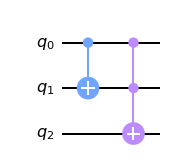

In [11]:
circ = QuantumCircuit(3)
circ.cx(0,1)
circ.ccx(0,1,2)
circ.draw(output = 'mpl')

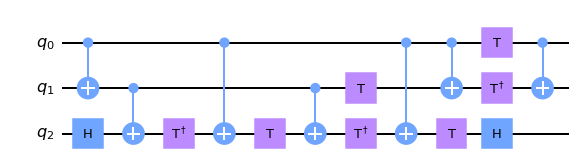

In [12]:
trans_circ = transpile(circ, optimization_level = 3)
trans_circ.draw(output = 'mpl')

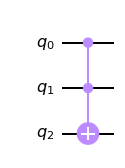

In [13]:
circ2 = QuantumCircuit(3)
circ2.ccx(0,1,2)
circ2.draw(output = 'mpl')

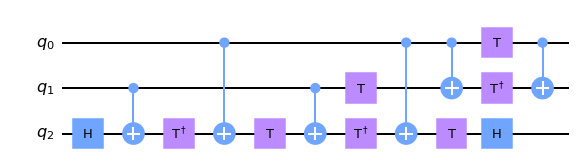

In [14]:
trans_circ2 = transpile(circ2, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

In [15]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ2, simulator).result()
unitary = result.get_unitary(circ2)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


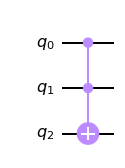

In [16]:
circ3 = QuantumCircuit(3)
circ3.ccx(0,1,2).inverse()
circ3.draw(output = 'mpl')

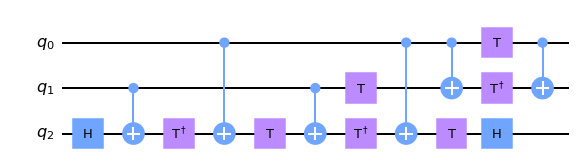

In [17]:
trans_circ2 = transpile(circ3, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

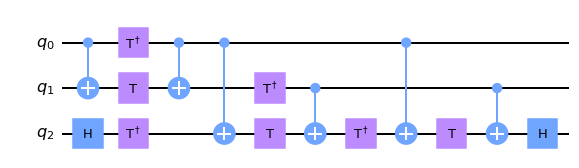

In [18]:
circ3 = trans_circ2.inverse()
circ3.draw(output = 'mpl')

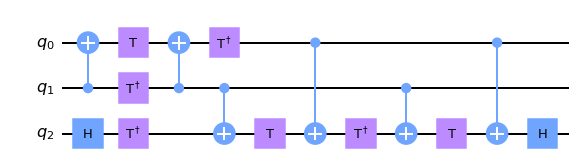

In [19]:
circ4 = QuantumCircuit(3)
circ4.cx(1,0)
circ4.t(0)
circ4.tdg(1)
circ4.cx(1,0)
circ4.h(2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.tdg(0)
circ4.t(2)
circ4.cx(0,2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.t(2)
circ4.cx(0,2)
circ4.h(2)
circ4.draw(output = 'mpl')

In [20]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ4, simulator).result()
unitary = result.get_unitary(circ4)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 1.00000000e+00-2.19800285e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   2.45660405e-16+8.32123684e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+1.72722830e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -7.78822944e-17+1.00484651e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.00000000e+00+1.72722830e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -7.78822944e-17+1.00484651e-16j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.34638103e-16-1.72722830e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.000

In [21]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5 = circ5 + trans_circ2.inverse()
circ5.draw()

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  This is separate from the ipykernel package so we can avoid doing imports until


┌─────┐                                                 
q_0: ──■─────■───┤ Tdg ├──■────■───────────────────────■─────────────────
     ┌─┴─┐ ┌─┴─┐ └┬───┬┘┌─┴─┐  │  ┌─────┐              │                 
q_1: ┤ X ├─┤ X ├──┤ T ├─┤ X ├──┼──┤ Tdg ├──■───────────┼─────────■───────
     ├───┤┌┴───┴┐ └───┘ └───┘┌─┴─┐└┬───┬┘┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌───┐
q_2: ┤ H ├┤ Tdg ├────────────┤ X ├─┤ T ├─┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ H ├
     └───┘└─────┘            └───┘ └───┘ └───┘└─────┘└───┘└───┘└───┘└───┘

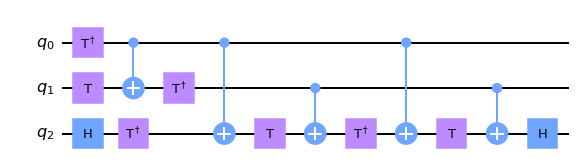

In [22]:
trans_circ = transpile(circ5, optimization_level = 2)
trans_circ.draw(output = 'mpl')

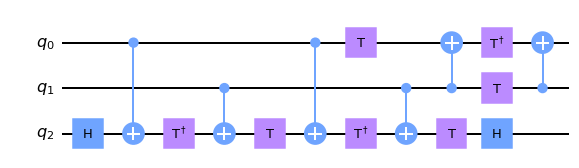

In [23]:
tqc = circ4.inverse()
tqc.draw(output = 'mpl')

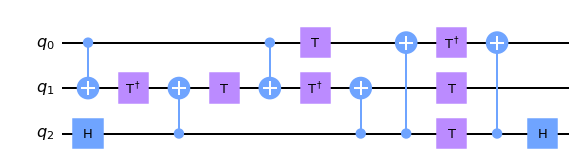

In [25]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.cx(2,1)
circ5.t(1)
circ5.cx(0,1)
circ5.t(0)
circ5.tdg(1)
circ5.cx(2,1)
circ5.cx(2,0)
circ5.tdg(0)
circ5.t(2)
circ5.t(1)
circ5.cx(2,0)
circ5.h(2)
circ5.draw(output = 'mpl')

In [26]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ5, simulator).result()
unitary = result.get_unitary(circ5)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 1.00000000e+00-6.12323400e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   2.45660405e-16+3.92523115e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00-6.12323400e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  7.91269515e-17+2.19800285e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.00000000e+00-6.12323400e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   7.91269515e-17+2.19800285e-17j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.34638103e-16+6.12323400e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.000

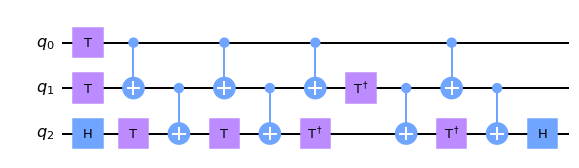

In [27]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.t(0)
circ5.t(1)
circ5.t(2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.t(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.h(2)
circ5.draw(output = 'mpl')

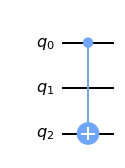

In [28]:
circ5 = QuantumCircuit(3)
circ5.cx(0,2)
circ5.draw(output = 'mpl')

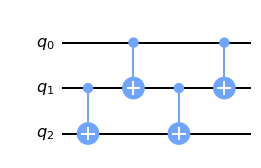

In [29]:
circ5 = QuantumCircuit(3)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.draw(output = 'mpl')

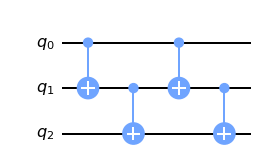

In [30]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.draw(output = 'mpl')